In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

We will use the wine dataset again, but this time we'll take a version that has already been binarized.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jvanlier/ML_DL_Intro_Course/master/Day1Notebooks/data/wine-binary.csv")

The `random_state` below ensures that we're all working on the same datasets going forward.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("isGood", axis=1), df["isGood"],
    random_state=42
)

# Simple decision tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

Next, try initializing the model and doing a fit on the wine dataset.

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Take a look at the train & test scores. How does this compare to Logistic Regression the results?

In [7]:
model.score(X_train, y_train)

1.0

In [8]:
model.score(X_test, y_test)

0.7225

**Answer: this is way higher on train, but the gap between train and test is also much bigger.**

How would you explain the gap between the training set and test set performance?

**Answer: it is overfitting, i.e. memorizing the training dataset and failing to generalize to unseen data.**

Let's see if we can reduce the gap a bit... check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and see if there's any way to reduce the complexity of the model to bring train and test closer together (ideally, test score should go up and as a side-effect, train score goes down).

In [9]:
model_reg = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=6)
model_reg.fit(X_train, y_train)
print("Train score", model_reg.score(X_train, y_train))
print("Test  score", model_reg.score(X_test, y_test))

Train score 0.8498748957464554
Test  score 0.725


During the wrap up, we'll see who managed to get the highest score and which parameters values were used (I'm trying to appeal to your competetive spirit here ;-))

You might notice that it's pretty difficult solve the overfitting problem with a Decision Tree. 

Luckily, Random Forests help out in this aspect. 

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=10)

Try setting a first baseline fit with 10 trees first.

In [16]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9899916597164303
0.7525


What do you notice, compared to the decision tree performance?

**Answer: train score is still high, but not 1.0, and test score is higher!**

Try running the model multiple times. Why do you get different scores in each try?

**Answer: because there is randomizing in the datasets for each tree and in which features are considered in each split.**

Ok, let's try playing with the parameters. Some things you can do:
- Bumping `n_estimators` to 20, 50, 100
- Limiting `max_depth` to 5, 10, 15

In [17]:
# YOUR CODE HERE
rf = RandomForestClassifier(n_estimators=100, max_depth=15)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.7925


# Grid Search
Luckily, we can automate this parameter-finding process.

In [18]:
from sklearn.model_selection import GridSearchCV

Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Complete the grid below using the options in the RandomForestClassifier documention page. Pick a couple you find interesting (not too many!)

In [19]:
param_grid = {
    "n_estimators": [10, 50, 250, 500, 1000],
    # YOUR PARAMS HERE
    "max_depth": [10, 15, 20, 25],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2, 3]
} 

In [20]:
gcv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
# I added n_jobs=-1 above to all cores of my CPU to speed things up.

In [21]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'n_estimators': [10, 50, 250, 500, 1000], 'max_depth': [10, 15, 20, 25], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

What are your best parameters?

In [22]:
gcv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

And what is the associated Cross Validation score?

In [23]:
gcv.best_score_

0.7964970809007507

And the score on the test set, with the best model according to the grid search?

In [24]:
print(gcv.score(X_test, y_test))
# or:
gcv.best_estimator_.score(X_test, y_test)

0.7975


0.7975

**Observation: this is only slightly better than the parameters I picked manually, but at least now I know that I've squeezed as much as I could out of it. Although it did end up picking `n_estimators` on the edge of the grid (1000), so I might want to increase that and re-run it...**

# Open-ended bonus assignments
- Try inspecting the RandomForestClassifier model to see if you can get a better understanding of what the model is doing. Hint: look up `feature_importances`.
- Show feature importances in a plot.
- Try using RandomizedSearchCV instead of GridSearchCV
- Instead of using Accuracy, see if you can get Precision, Recall and F1 score metrics.  And/or a confusion matrix. The scikit-learn documentation should be helpful. 

In [25]:
imp = gcv.best_estimator_.feature_importances_
imp

array([0.07313497, 0.11358939, 0.06707943, 0.05474859, 0.07346973,
       0.05568557, 0.09637492, 0.0858777 , 0.06514364, 0.13189004,
       0.183006  ])

In [26]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

The order of these values corresponds which each other.

In [29]:
df_imp = pd.DataFrame({"imp": imp, "cols": X_train.columns}) \
           .sort_values(by="imp", ascending=False)
df_imp.head()

,imp,cols
10,0.183006,alcohol
9,0.131890,sulphates
1,0.113589,volatile acidity
6,0.096375,total sulfur dioxide
7,0.085878,density


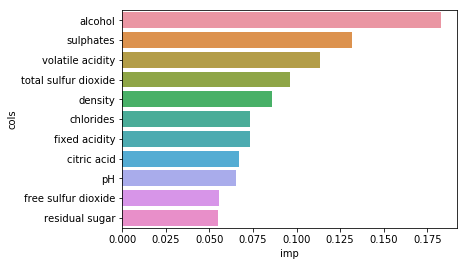

In [32]:
sns.barplot(x="imp", y="cols", data=df_imp)

I'll leave the remainder of the bonus exercises to you!